In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.preprocessing import Normalizer, normalize

In [2]:
df = pd.read_csv('datasets/diabetes.csv')

df =  df.drop(['Outcome'], axis = 1)

## Normalization

Normalization applies a transformation to each row (sample) in the data so that it fulfils a norm condition. For example, if the value of features in a row are f1, f2, f3...fn then:
* <b>L1 norm:</b> |f1| + |f2| + |f3| ... |fn| = 1
* <b>L2 norm:</b> sqrt(f1<sup>2</sup> + f2<sup>2</sup> + f3<sup>2</sup>...fn<sup>2</sup>) = 1
* <b>Max norm:</b> Each value is expressed as a proportion of a max value in the row

#### L2 norm is the default for the normalize function

In [3]:
l2_normalized_df = pd.DataFrame(normalize(df, norm='l2'), 
                                columns=df.columns)

In [4]:
l2_normalized_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.033552,0.827625,0.402628,0.195722,0.000000,0.187893,0.003506,0.279603
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144
2,0.040398,0.924097,0.323181,0.000000,0.000000,0.117658,0.003393,0.161591
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655


#### Square the values in Row 0

In [5]:
l2_normalized_df.iloc[0].pow(2)

Pregnancies                 0.001126
Glucose                     0.684963
BloodPressure               0.162110
SkinThickness               0.038307
Insulin                     0.000000
BMI                         0.035304
DiabetesPedigreeFunction    0.000012
Age                         0.078178
Name: 0, dtype: float64

#### Square root of sum of squares of values in Row 0

In [6]:
math.sqrt(l2_normalized_df.iloc[0].pow(2).sum())

1.0

#### Pick another random row to check square root of sum of squares

In [7]:
math.sqrt(l2_normalized_df.iloc[13].pow(2).sum())

0.9999999999999999

#### Apply L1 norm

In [8]:
l1_normalized_df = pd.DataFrame(normalize(df, norm='l1'), 
                                columns=df.columns)

l1_normalized_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.017380,0.428703,0.208558,0.101383,0.000000,0.097327,0.001816,0.144832
1,0.004185,0.355721,0.276207,0.121364,0.000000,0.111320,0.001469,0.129734
2,0.025726,0.588477,0.205806,0.000000,0.000000,0.074926,0.002161,0.102903
3,0.003103,0.276169,0.204799,0.071369,0.291684,0.087195,0.000518,0.065163
4,0.000000,0.298873,0.087262,0.076355,0.366502,0.094025,0.004991,0.071991


#### Sum of absolute values should equal 1
In this dataset, all values are positive, so abs() calculation is not required, but included here to illustrate how the L1 norm is calculated

In [9]:
l1_normalized_df.iloc[0].abs().sum()

0.9999999999999998

In [10]:
l1_normalized_df.iloc[31].abs().sum()

1.0

#### Relationships between variables will change after normalization
Scatter plots will look quite different when we plot Insulin levels vs. Glucose readings

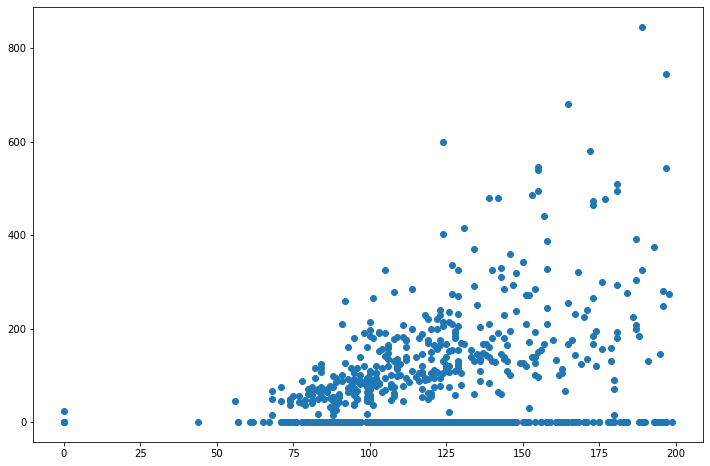

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(df['Glucose'], df['Insulin'])

plt.show()

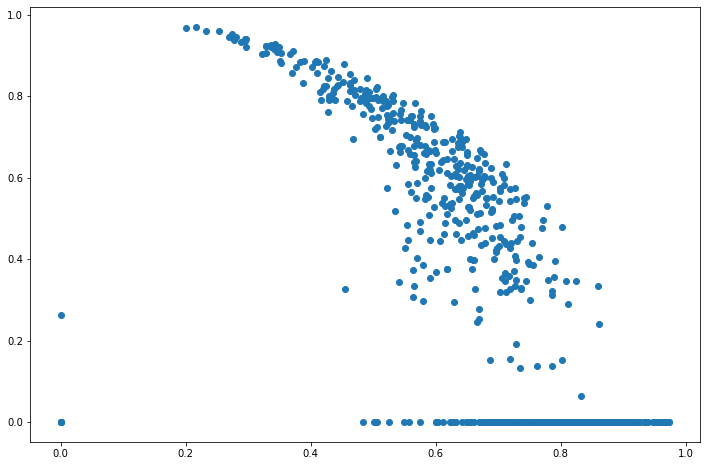

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(l2_normalized_df['Glucose'], 
            l2_normalized_df['Insulin'])

plt.show()

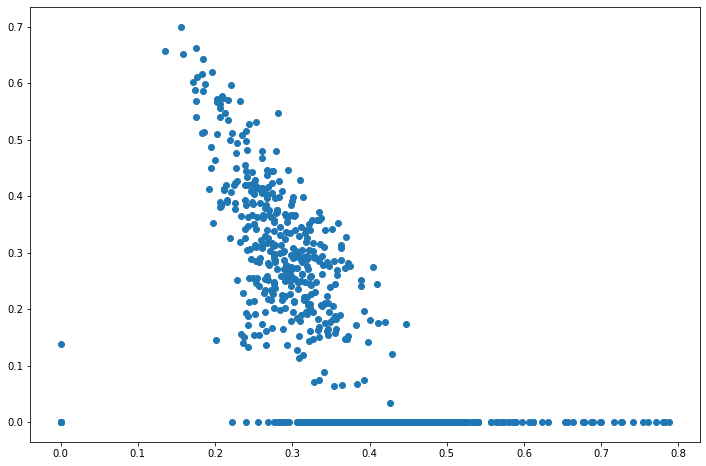

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(l1_normalized_df['Glucose'], 
            l1_normalized_df['Insulin'])

plt.show()

#### Normalization with Max norm
Each value in a row is expressed as a proportion of the max value. Check original values first

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


#### Max Norm applied
The value for the glucose reading is the highest in the first 3 rows, but Insulin is the max value in the next 2

In [15]:
max_normalized_df = pd.DataFrame(normalize(df, norm='max'), 
                                 columns=(df.columns))

max_normalized_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.040541,1.000000,0.486486,0.236486,0.0,0.227027,0.004236,0.337838
1,0.011765,1.000000,0.776471,0.341176,0.0,0.312941,0.004129,0.364706
2,0.043716,1.000000,0.349727,0.000000,0.0,0.127322,0.003672,0.174863
3,0.010638,0.946809,0.702128,0.244681,1.0,0.298936,0.001777,0.223404
4,0.000000,0.815476,0.238095,0.208333,1.0,0.256548,0.013619,0.196429


#### Manually perform normalization with max norm for Row 0

In [16]:
df.iloc[0]/df.iloc[0].max()

Pregnancies                 0.040541
Glucose                     1.000000
BloodPressure               0.486486
SkinThickness               0.236486
Insulin                     0.000000
BMI                         0.227027
DiabetesPedigreeFunction    0.004236
Age                         0.337838
Name: 0, dtype: float64

### Cosine Similarity
Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them.

First examine 3 samples from the dataset. Rows 10 and 11 are quite similar to each other (vary in number of pregnancies and glucose levels). Row 8 is quite different from the other 2

In [17]:
df.iloc[[8, 10, 11]]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
8,2,197,70,45,543,30.5,0.158,53
10,4,110,92,0,0,37.6,0.191,30
11,10,168,74,0,0,38.0,0.537,34


In [18]:
cosine_similarity(df.iloc[10].values.reshape(1, -1), 
                  df.iloc[11].values.reshape(1, -1))

array([[0.96221582]])

In [19]:
cosine_similarity(df.iloc[8].values.reshape(1, -1), 
                  df.iloc[10].values.reshape(1, -1))

array([[0.34751949]])

In [20]:
cosine_similarity(df.iloc[8].values.reshape(1, -1), 
                  df.iloc[11].values.reshape(1, -1))

array([[0.36851998]])

In [21]:
cosine_similarity(l2_normalized_df.iloc[8].values.reshape(1, -1), 
                  l2_normalized_df.iloc[11].values.reshape(1, -1))

array([[0.36851998]])